DATA SCIENCE LIFECYCLE EXAMS
THEME 4: EDUCATION: ARTIFICIAL INTELLIGENCE (AI) IN HIGHER EDUCATION 
NAME: EFPREM OKELLO
ACCESS NUMBER: B31324

STEP 1: LOAD IN DATA SETS
LINK TO DATA SET: https://archive.ics.uci.edu/dataset/320/student+performance

In [2]:
import pandas as pd

# Load the datasets
d1 = pd.read_csv(r"c:\Users\LENOVO\Desktop\DSA Masters\Data Science Lifecycle\Final Exams\Students performance\student-mat.csv", sep=";")
d1['Subject'] = 'Mathematics'  # Add a 'Subject' column to d1

d2 = pd.read_csv(r"c:\Users\LENOVO\Desktop\DSA Masters\Data Science Lifecycle\Final Exams\Students performance\student-por.csv", sep=";")
d2['Subject'] = 'Portuguese'  # Add a 'Subject' column to d2

# Combine the datasets vertically
df = pd.concat([d1, d2], axis=0, ignore_index=True)

# Convert categorical columns to 'category' data type
categorical_columns = [
    'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 
    'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'Subject'
]
df[categorical_columns] = df[categorical_columns].astype('category')

# Convert binary columns to 'category' data type
binary_columns = [
    'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'
]
df[binary_columns] = df[binary_columns].astype('category')

# Convert integer columns to 'int' data type
integer_columns = [
    'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 
    'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'
]
df[integer_columns] = df[integer_columns].astype('int')

# Display the improved DataFrame
print(df.head())
print(df.info())

df.columns

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  freetime goout  Dalc  Walc  health absences  G1  G2  G3      Subject  
0        3     4     1     1       3        6   5   6   6  Mathematics  
1        3     3     1     1       3        4   5   5   6  Mathematics  
2        3     2     2     3       3       10   7   8  10  Mathematics  
3        2     2     1     1       5        2  15  14  15  Mathematics  
4        3     2     1     2       5        4   6  10  10  Mathematics  

[5 rows x 34 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Subject'],
      dtype='object')

STEP 2: DATA PREPROCESSING

In [3]:
# Check for missing values
print(df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
Subject       0
dtype: int64


In [4]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian'])

# Feature engineering: Create an average grade column
df_encoded['avg_grade'] = (df_encoded['G1'] + df_encoded['G2'] + df_encoded['G3']) / 3

# Normalize numerical features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'avg_grade']
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Display the preprocessed DataFrame
print(df_encoded.head())

        age  Medu  Fedu  traveltime  studytime  failures schoolsup famsup  \
0  0.428571  1.00  1.00    0.333333   0.333333       0.0       yes     no   
1  0.285714  0.25  0.25    0.000000   0.333333       0.0        no    yes   
2  0.000000  0.25  0.25    0.000000   0.333333       1.0       yes     no   
3  0.000000  1.00  0.50    0.000000   0.666667       0.0        no    yes   
4  0.142857  0.75  0.75    0.000000   0.333333       0.0        no    yes   

  paid activities  ... Fjob_services Fjob_teacher reason_course reason_home  \
0   no         no  ...         False         True          True       False   
1   no         no  ...         False        False          True       False   
2  yes         no  ...         False        False         False       False   
3  yes        yes  ...          True        False         False        True   
4  yes         no  ...         False        False         False        True   

   reason_other  reason_reputation  guardian_father  guardian_

STEP 3: EXPLORATORY DATA ANALYSIS

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian'])

# Feature engineering: Create an average grade column
df_encoded['avg_grade'] = (df_encoded['G1'] + df_encoded['G2'] + df_encoded['G3']) / 3

# Normalize numerical features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'avg_grade']
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Reconstruct the 'sex' column from the encoded columns
df_encoded['sex'] = df_encoded['sex_F'].apply(lambda x: 'F' if x == 1 else 'M')

# Display the preprocessed DataFrame
print(df_encoded.head())





        age  Medu  Fedu  traveltime  studytime  failures schoolsup famsup  \
0  0.428571  1.00  1.00    0.333333   0.333333       0.0       yes     no   
1  0.285714  0.25  0.25    0.000000   0.333333       0.0        no    yes   
2  0.000000  0.25  0.25    0.000000   0.333333       1.0       yes     no   
3  0.000000  1.00  0.50    0.000000   0.666667       0.0        no    yes   
4  0.142857  0.75  0.75    0.000000   0.333333       0.0        no    yes   

  paid activities  ... Fjob_teacher reason_course reason_home reason_other  \
0   no         no  ...         True          True       False        False   
1   no         no  ...        False          True       False        False   
2  yes         no  ...        False         False       False         True   
3  yes        yes  ...        False         False        True        False   
4  yes         no  ...        False         False        True        False   

   reason_reputation  guardian_father  guardian_mother  guardian_oth

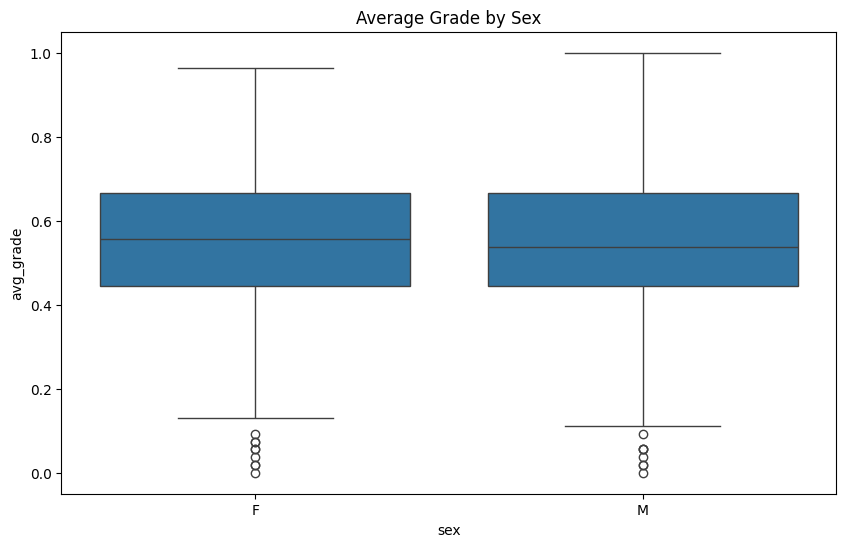

In [6]:
# Analyze performance by sex
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='avg_grade', data=df_encoded)
plt.title('Average Grade by Sex')
plt.show()



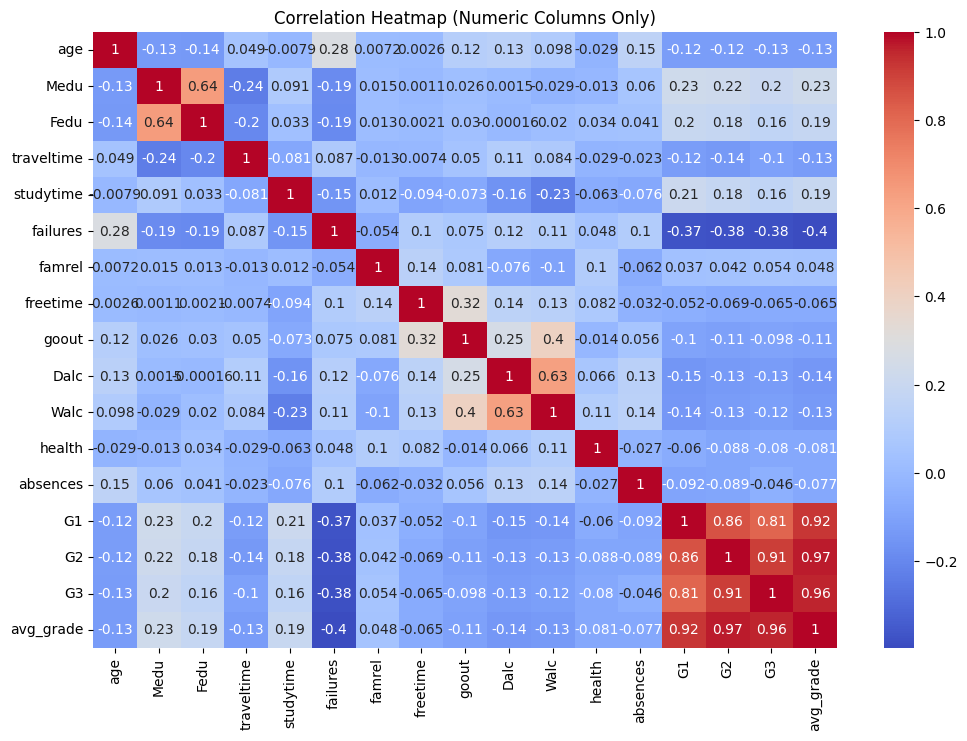

In [7]:
# Correlation heatmap (only numeric columns)
plt.figure(figsize=(12, 8))
numeric_columns = df_encoded.select_dtypes(include=['number'])  # Select only numeric columns
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()



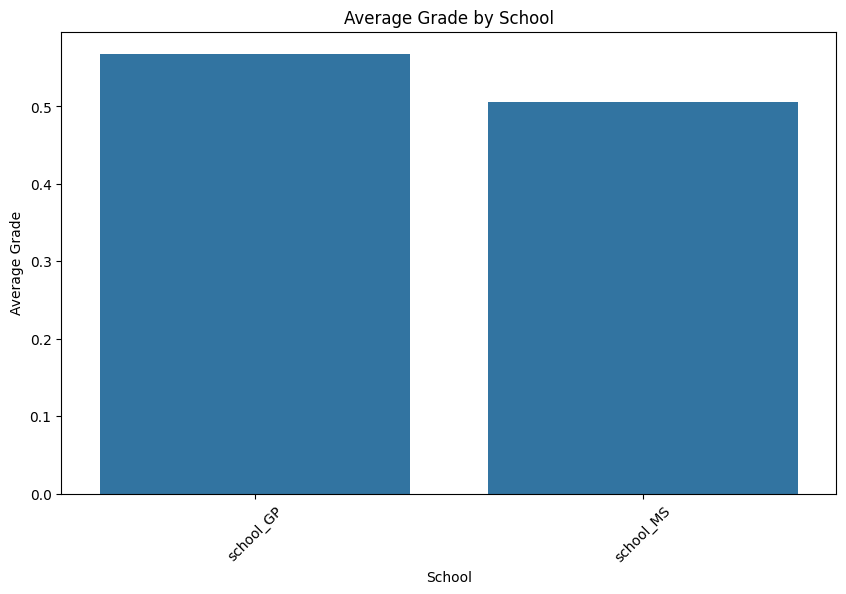

In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns



# Normalize numerical features
scaler = MinMaxScaler()
numerical_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'avg_grade']
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Analyze average grade by school
school_columns = [col for col in df_encoded.columns if col.startswith('school_')]
school_avg_grades = {}
for school_col in school_columns:
    school_avg_grades[school_col] = df_encoded[df_encoded[school_col] == 1]['avg_grade'].mean()

# Plot the results
school_avg_df = pd.DataFrame(list(school_avg_grades.items()), columns=['School', 'Average Grade'])
plt.figure(figsize=(10, 6))
sns.barplot(x='School', y='Average Grade', data=school_avg_df)
plt.title('Average Grade by School')
plt.xticks(rotation=45)
plt.show()


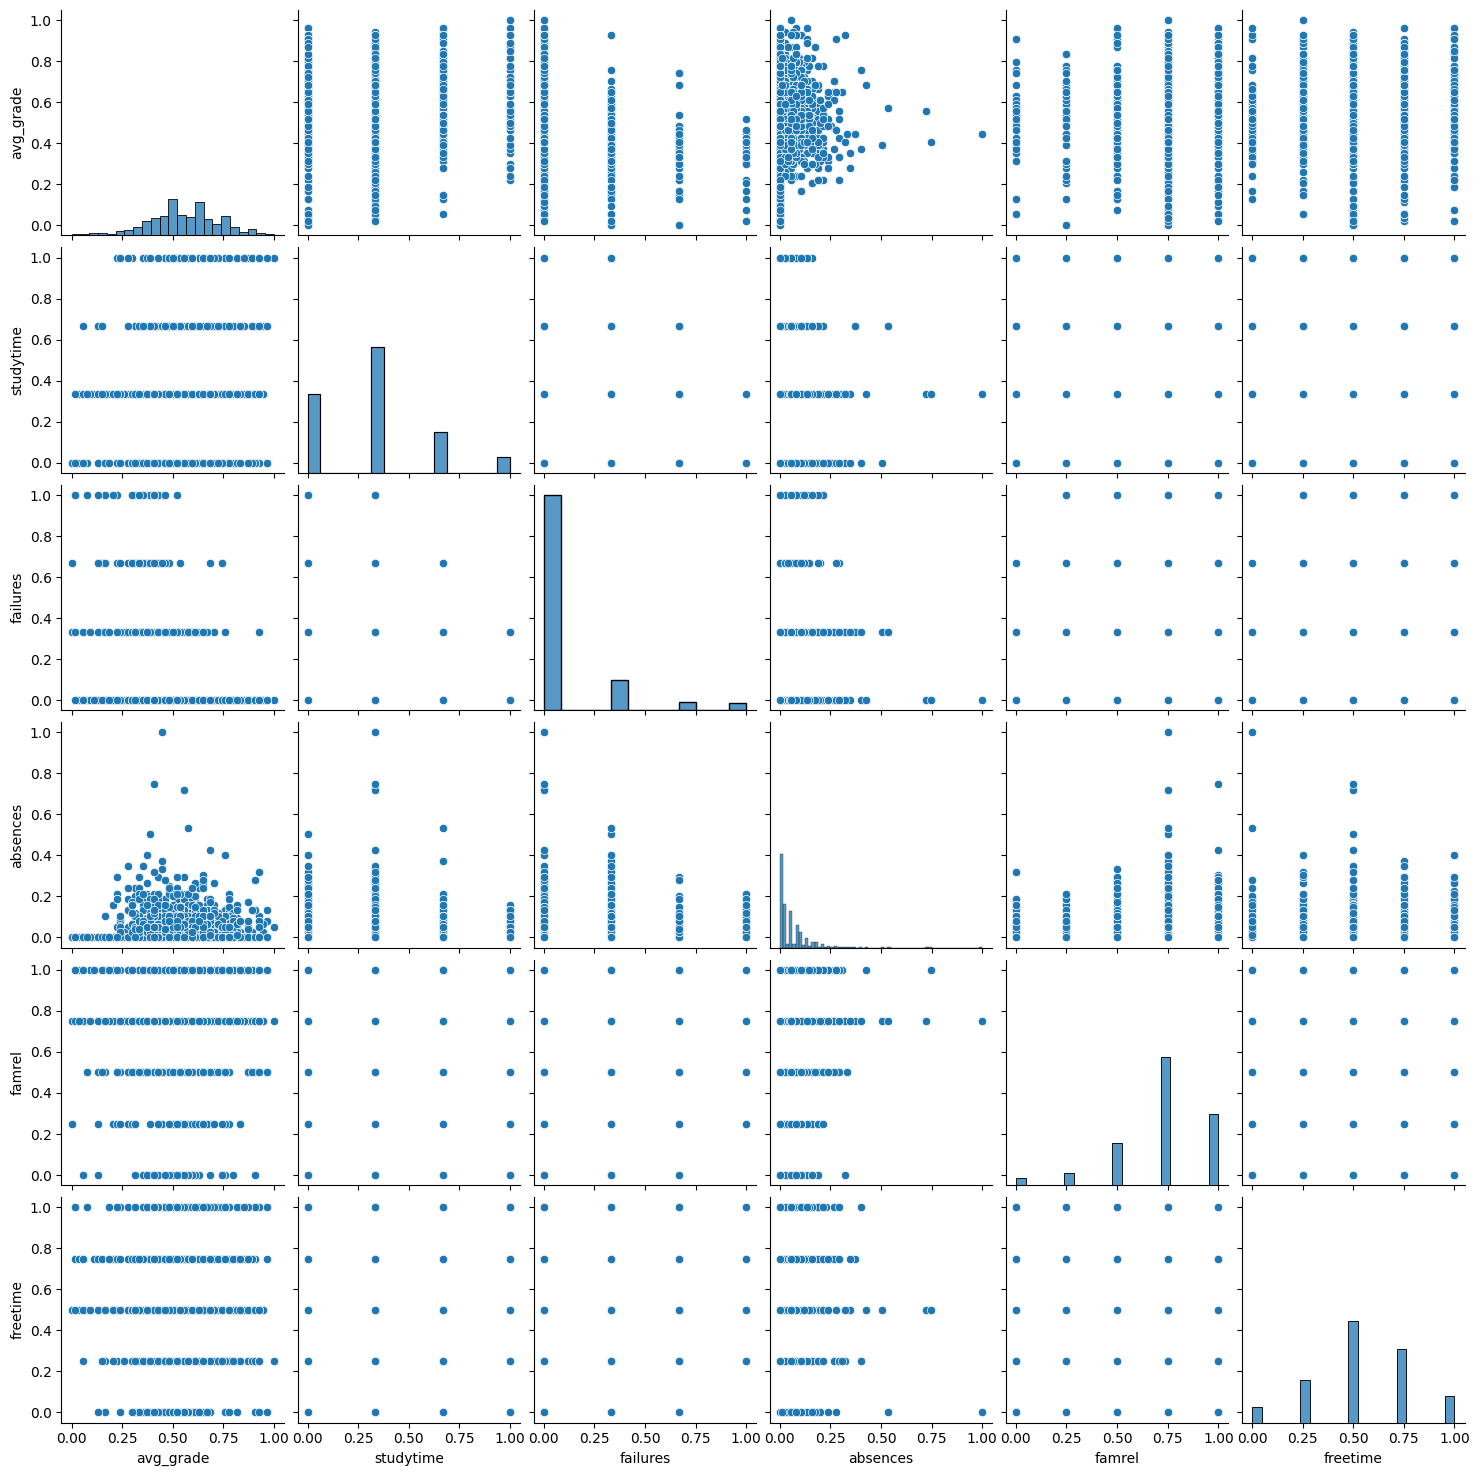

In [9]:
# Pairplot for key variables
sns.pairplot(df_encoded[['avg_grade', 'studytime', 'failures', 'absences', 'famrel', 'freetime']])
plt.show()

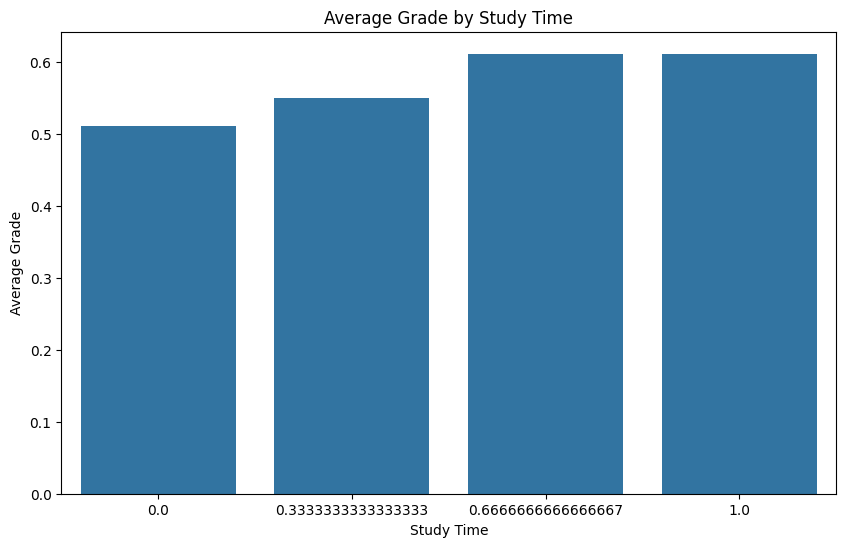

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by studytime and calculate average grade
studytime_performance = df_encoded.groupby('studytime')['avg_grade'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='studytime', y='avg_grade', data=studytime_performance)
plt.title('Average Grade by Study Time')
plt.xlabel('Study Time')
plt.ylabel('Average Grade')
plt.show()

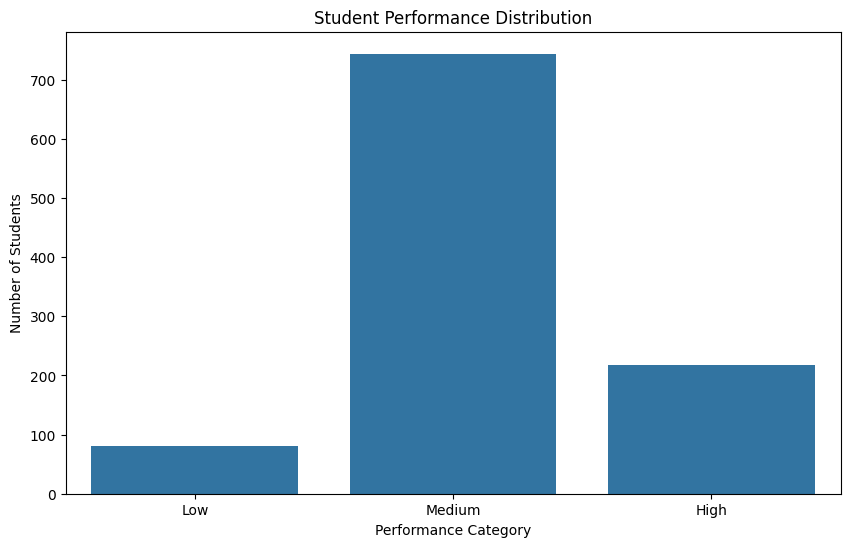

In [13]:
# Categorize students based on avg_grade
df_encoded['performance_category'] = pd.cut(df_encoded['avg_grade'], bins=[0, 0.3, 0.7, 1], labels=['Low', 'Medium', 'High'])

# Plot performance distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='performance_category', data=df_encoded, order=['Low', 'Medium', 'High'])
plt.title('Student Performance Distribution')
plt.xlabel('Performance Category')
plt.ylabel('Number of Students')
plt.show()

STEP 4: BUILD, EVALUATE AND OPTIMIZE PREDICTIVE MODEL

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Split data into features (X) and target (y)
X = df_encoded.drop(columns=['avg_grade', 'G1', 'G2', 'G3'])
y = df_encoded['avg_grade']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for missing values
print("Missing values in X_train:")
print(X_train.isnull().sum())

print("Missing values in y_train:")
print(y_train.isnull().sum())

# Handle missing values
# Option 1: Drop rows with missing values
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Ensure y_train aligns with X_train

X_test = X_test.dropna()
y_test = y_test[X_test.index]  # Ensure y_test aligns with X_test

# Option 2: Fill missing values (e.g., with mean)
# X_train = X_train.fillna(X_train.mean())
# X_test = X_test.fillna(X_train.mean())  # Use training data statistics

# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {
        'Model': model_name,
        'MAE': mae,
        'MSE': mse,
        'R²': r2
    }

# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_metrics = evaluate_model(y_test, y_pred_lr, "Linear Regression")

# Model 2: Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_metrics = evaluate_model(y_test, y_pred_rf, "Random Forest")

# Model 3: Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
gb_metrics = evaluate_model(y_test, y_pred_gb, "Gradient Boosting")

# Compare model performance
results = pd.DataFrame([lr_metrics, rf_metrics, gb_metrics])
print("Model Performance Comparison:")
print(results)

Missing values in X_train:
age                     0
Medu                    0
Fedu                    0
traveltime              0
studytime               0
failures                0
schoolsup               0
famsup                  0
paid                    0
activities              0
nursery                 0
higher                  0
internet                0
romantic                0
famrel                  0
freetime                0
goout                   0
Dalc                    0
Walc                    0
health                  0
absences                0
Subject                 0
school_GP               0
school_MS               0
sex_F                   0
sex_M                   0
address_R               0
address_U               0
famsize_GT3             0
famsize_LE3             0
Pstatus_A               0
Pstatus_T               0
Mjob_at_home            0
Mjob_health             0
Mjob_other              0
Mjob_services           0
Mjob_teacher            0
Fjob_at_hom

ValueError: could not convert string to float: 'no'